In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
df = pd.read_csv('./mnist_train.csv')

In [3]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df['label']

In [5]:
X = df[df.columns.drop('label')]

In [6]:
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X.iloc[0]

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 0, Length: 784, dtype: int64

In [8]:
def plot_image(index):
    data = np.reshape(list(X.iloc[index]),(-1,28))
    plt.imshow(data, interpolation='nearest')
    plt.show()

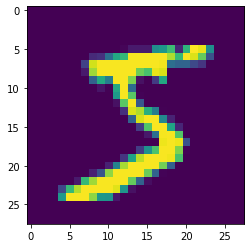

5


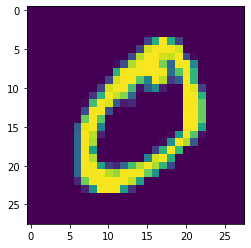

0


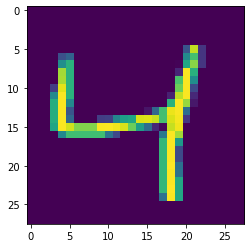

4


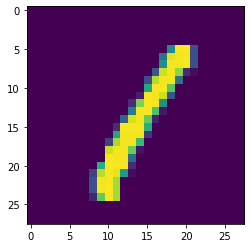

1


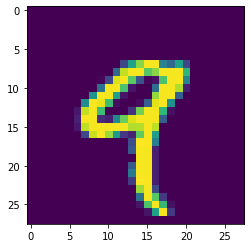

9


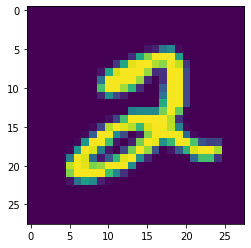

2


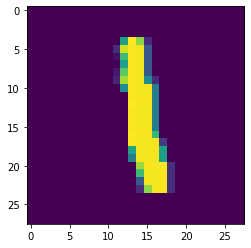

1


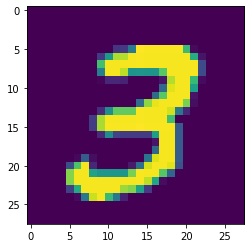

3


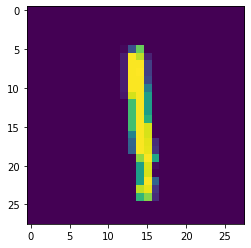

1


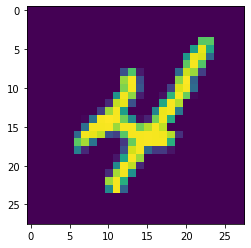

4


In [9]:
for i in range(10):
    plot_image(i)
    print(y[i])

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf = DecisionTreeClassifier()

In [13]:
clf = clf.fit(X_train, y_train)

In [14]:
y_pred = clf.predict(X_test)

In [15]:
confusion_matrix(y_pred, y_test)

array([[1770,    4,   31,   19,   15,   29,   24,    5,   20,   19],
       [   1, 2116,   25,   12,    6,   18,    8,   23,   22,   14],
       [  22,   12, 1636,   66,   26,   19,   23,   44,   57,   24],
       [  25,   10,   72, 1690,   20,   98,   11,   19,   70,   39],
       [  15,   10,   31,   12, 1649,   15,   47,   24,   56,   80],
       [  41,   13,   14,   84,   15, 1471,   43,   14,   69,   41],
       [  21,   16,   25,   15,   19,   47, 1757,    4,   36,    8],
       [   6,   10,   31,   35,   34,   11,    2, 1905,   18,   73],
       [  25,   20,   57,   69,   38,   54,   42,   16, 1482,   76],
       [  20,    7,   19,   33,   96,   37,   23,   67,   64, 1574]])

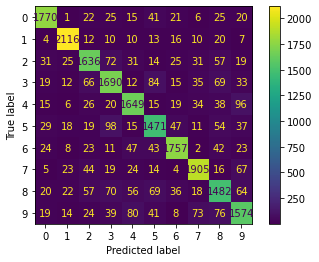

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)